# Deep Learning A Z Mapa Autoorganizável - Vinhos

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=04f49335e8442fa8bf3d3577898f4c43c520233cdd29166af2a3972eaf08f520
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [ ]:
import minisom
import pandas as pd
import sklearn
import matplotlib

In [ ]:
pd.__version__, sklearn.__version__, matplotlib.__version__

('2.0.3', '1.2.2', '3.7.1')

In [ ]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [ ]:
base = pd.read_csv('wines.csv')
base

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
X = base.iloc[:, 1:14].values
y = base.iloc[:, 0].values

In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [ ]:
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [ ]:
X.shape

(178, 13)

In [ ]:
som = MiniSom(x = 8, y = 8, input_len = 13, sigma = 1.0, learning_rate = 0.5, random_seed = 2)

In [ ]:
som.random_weights_init(X)

In [ ]:
som.train_random(data = X, num_iteration=600)

In [ ]:
som._weights.shape

(8, 8, 13)

In [ ]:
som._weights

array([[[0.41619617, 0.39449386, 0.50685798, 0.4422608 , 0.28651455,
         0.62779354, 0.50350414, 0.5263484 , 0.54477405, 0.19242564,
         0.67435595, 0.63823686, 0.28429463],
        [0.72914786, 0.57451979, 0.52076754, 0.31312334, 0.38252807,
         0.62951827, 0.53988429, 0.23959452, 0.4316248 , 0.29844888,
         0.37657397, 0.72298876, 0.47053241],
        [0.53371796, 0.32082308, 0.51228125, 0.37102385, 0.25630737,
         0.44474728, 0.24429873, 0.66662266, 0.3169272 , 0.33613626,
         0.26874899, 0.34012126, 0.33540481],
        [0.28051343, 0.34827867, 0.83688038, 0.7920189 , 0.41270368,
         0.60188459, 0.75799137, 0.68549201, 0.42792331, 0.3603494 ,
         0.35878113, 0.70381793, 0.17784128],
        [0.58224813, 0.24425604, 0.54544019, 0.43512895, 0.31209432,
         0.43000405, 0.42551836, 0.58164702, 0.43839386, 0.20401329,
         0.59252411, 0.53116227, 0.40113876],
        [0.2678605 , 0.33046249, 0.48202195, 0.54613877, 0.20415451,
         0.

In [ ]:
som._activation_map.shape

(8, 8)

In [ ]:
8 * 8

64

In [ ]:
som._activation_map

array([[0.44956876, 0.56993624, 0.5989823 , 1.01076888, 0.99602082,
        1.02694534, 1.02621946, 1.0434932 ],
       [0.35569965, 0.35245628, 0.39140785, 0.62257843, 1.16354021,
        0.97447592, 1.00274683, 1.08165079],
       [0.43565266, 0.5284021 , 0.53599411, 0.40713493, 1.03750681,
        1.10117289, 1.13923   , 1.2132762 ],
       [0.60259955, 0.45608407, 0.44432482, 0.52753919, 1.02341705,
        1.01268717, 0.87906209, 0.80984426],
       [1.26708687, 0.84962124, 0.80980696, 0.81760962, 1.16372211,
        1.16743137, 0.7144217 , 0.49091743],
       [1.12651402, 0.98707452, 1.09193669, 0.94942721, 1.20554389,
        1.10402909, 0.50895849, 0.38530815],
       [0.8996517 , 0.89958258, 0.84790479, 1.12247065, 1.34449129,
        1.27627718, 0.73433383, 0.43657318],
       [1.07857222, 0.9406111 , 0.82548421, 1.17727479, 1.37946851,
        1.2744922 , 1.17754265, 0.54958005]])

In [ ]:
q = som.activation_response(X)

In [ ]:
q.shape

(8, 8)

In [ ]:
q

array([[1., 3., 3., 3., 1., 3., 4., 3.],
       [2., 2., 3., 2., 2., 5., 2., 2.],
       [3., 6., 5., 4., 2., 3., 3., 6.],
       [0., 4., 4., 2., 1., 0., 0., 0.],
       [6., 0., 3., 1., 3., 3., 1., 5.],
       [1., 3., 3., 1., 5., 0., 1., 4.],
       [0., 2., 5., 3., 5., 5., 0., 5.],
       [3., 3., 0., 4., 7., 7., 5., 0.]])

In [ ]:
som.distance_map()

array([[0.2083343 , 0.49505489, 0.36595943, 0.53699424, 0.45495886,
        0.34144116, 0.38726523, 0.30690068],
       [0.42165932, 0.55767422, 0.61038474, 0.6703502 , 0.72213498,
        0.70487649, 0.61226905, 0.42821316],
       [0.2985044 , 0.56081598, 0.50712765, 0.63841767, 0.69735999,
        0.63637679, 0.62002727, 0.45337874],
       [0.42719358, 0.69786223, 0.57788103, 0.72557657, 0.70988856,
        0.53842819, 0.62533991, 0.41288023],
       [0.70338841, 0.82461606, 0.81696335, 0.80662148, 0.67614852,
        0.77814384, 0.72799339, 0.50103284],
       [0.5632557 , 1.        , 0.89906084, 0.84171289, 0.79993029,
        0.77343915, 0.91744271, 0.44542737],
       [0.4322163 , 0.68899436, 0.81167546, 0.89110166, 0.95022937,
        0.95904814, 0.96245848, 0.57107232],
       [0.27782021, 0.42071268, 0.48020104, 0.66491414, 0.52463645,
        0.61668718, 0.74746839, 0.28013285]])

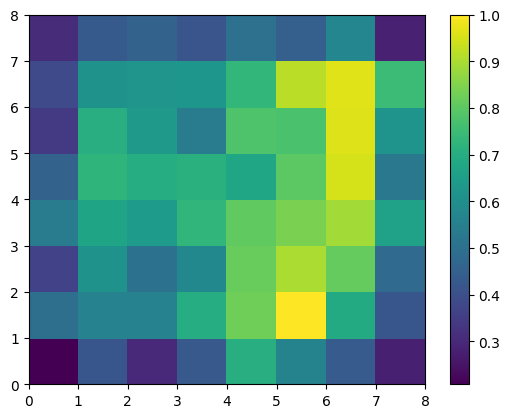

In [ ]:
pcolor(som.distance_map().T)
colorbar(); # MID - mean inter neuron distance

In [ ]:
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [ ]:
w = som.winner(X[2])
w

(3, 2)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

In [ ]:
markers[0]

'o'

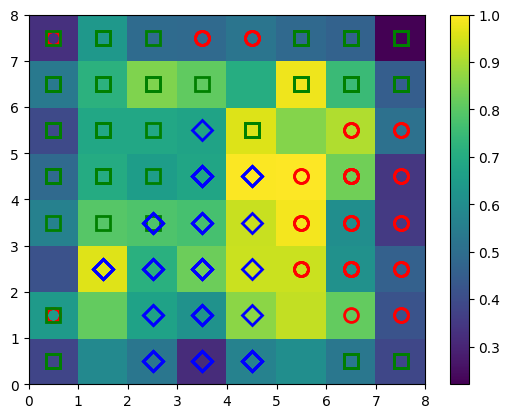

In [ ]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
  #print(i)
  #print(x)
  w = som.winner(x)
  #print(w)
  plot(w[0] + 0.5, w[1] + 0.5, markers[y[i] - 1], markerfacecolor='None',
       markeredgecolor=color[y[i]-1], markeredgewidth=2, markersize=10)